In [202]:
import pandas as pd
import numpy as np
import os

from converter import convert_list_to_ensg
from hypergeom import parameters_for_hypergeometric
os.chdir("datasets/cancers/lung/")

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/cancers/lung/'

In [76]:
lists = {k:[] for k in np.array([[[f"new_{ud}_{ap}_{ds}" for ap in ["all", "paired"]] for ud in ["up","down"]] for ds in ["LUAD", "LUSC"]]).ravel()}

In [84]:
for l in lists.keys():
    lists[l] = convert_list_to_ensg(pd.read_csv(f"https://github.com/ELELAB/LUAD_LUSC_TCGA_comparison/raw/master/4-final_gene_list_DEA_TCGA/final_gene_list/{l}.txt", header=None).values.ravel())

In [95]:
hsbm_list_topics = pd.read_csv("topsbm/topsbm_level_1_topics.csv")
gene_list = hsbm_list_topics.values.ravel().astype(str)
gene_list = list(map(lambda g: g[:15],filter(lambda g: g!="nan", gene_list)))
hsbm_list=pd.Series(index=[g[:15] for g in gene_list], dtype=str)
for topic in hsbm_list_topics.columns:
    hsbm_list[[g[:15] for g in hsbm_list_topics[topic].dropna()]]=topic

In [184]:
def give_me_g(g):
    if (type(g)==np.array) or (type(g)==np.ndarray) or (type(g)==list):
        g = g[0]
    if type(g)!=str:
        return None  
    if str(g)!="nan":
        if g[:4] == "ENSG":
            return str(g)
    return None

In [195]:
df_Papaleo = pd.DataFrame()
for (name, l) in lists.items():
    df_Papaleo[name]=[np.nan for _ in range(25000)]
    df_Papaleo[name][:len(l)]=l
df_Papaleo=df_Papaleo.dropna(how="all", axis=0)
Papaleo_list=pd.Series(index=np.unique([give_me_g(g) for g in df_Papaleo.values.ravel() if give_me_g(g) is not None]), dtype=str)
for topic in df_Papaleo.columns:
    mask = Papaleo_list.index.isin([give_me_g(g) for g in df_Papaleo[topic].dropna() if give_me_g(g) is not None])
    Papaleo_list[mask]=topic

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [243]:
import importlib, hypergeom
importlib.reload(hypergeom)
from hypergeom import *

In [244]:
list_1 = hsbm_list
list_2 = Papaleo_list

hyper_params = parameters_for_hypergeometric(list_1, list_2)
df_cmap = build_map(*hyper_params, last_name="Papaleo")

(12, 8)


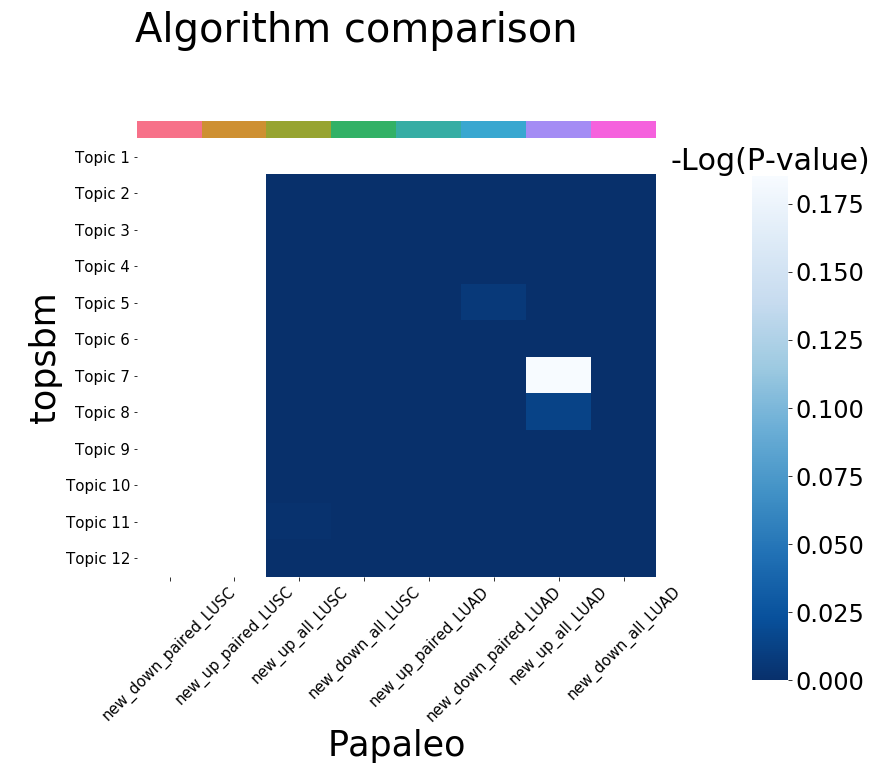

In [247]:
cm = plot_map(df_cmap, "topsbm", "Papaleo");